In [95]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [96]:
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [97]:
page = requests.get(url)
soup = bs(page.text, 'html.parser')

In [98]:
data = []
data_iterator = iter(soup.find_all('td'))


In [99]:
while True:
    try:
        _data={
            "country": next(data_iterator).text,
            "confirmed":int(next(data_iterator).text.replace(',','')),
            "death": int(next(data_iterator).text.replace(',','')),
            "continent": next(data_iterator).text }
        data.append(_data)
 
   
    except StopIteration:
        break
 

In [100]:
covid_df = pd.DataFrame (data, columns = ['country','confirmed','death',"continent"])

          confirmed          death
count  2.200000e+02     220.000000
mean   5.701097e+05   12530.281818
std    2.441283e+06   48659.341147
min    1.000000e+00       0.000000
25%    4.093250e+03      56.000000
50%    3.670950e+04     519.500000
75%    2.458672e+05    4523.750000
max    3.070429e+07  558422.000000
                  confirmed                                              \
                      count          mean           std   min       25%   
continent                                                                 
                        1.0  9.000000e+00           NaN   9.0      9.00   
Africa                 57.0  7.313609e+04  2.140038e+05  10.0   5303.00   
Asia                   49.0  5.585729e+05  1.726069e+06  48.0  17896.00   
Australia/Oceania      12.0  4.580333e+03  9.398052e+03   1.0      3.75   
Europe                 48.0  7.949043e+05  1.244694e+06  27.0  70113.75   
North America          39.0  9.057096e+05  4.911986e+06  20.0    807.50   
South Amer

<AxesSubplot:xlabel='country'>

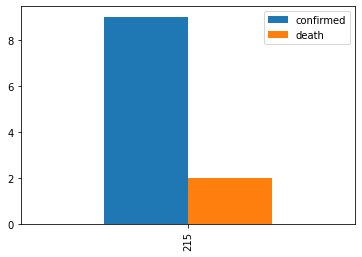

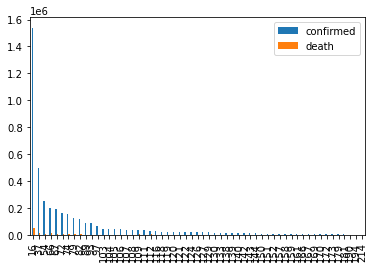

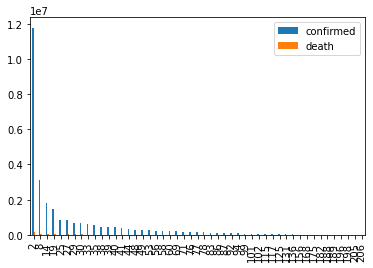

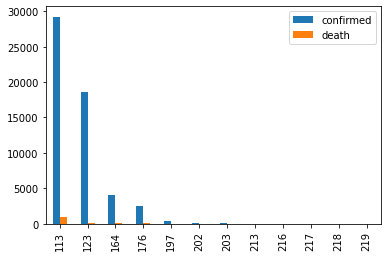

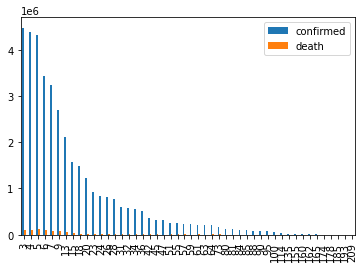

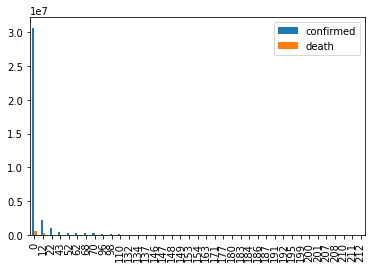

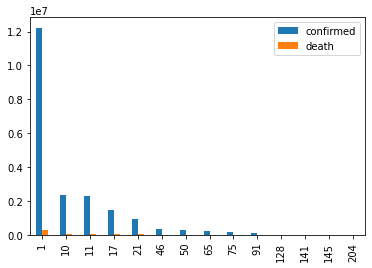

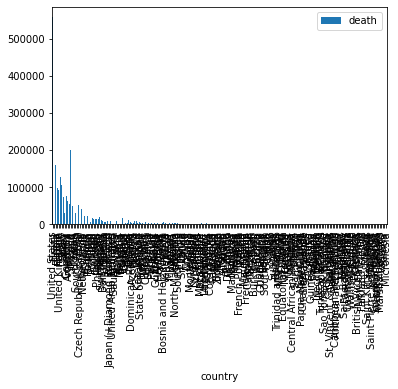

In [20]:
covid_df.to_csv('covid_cases.csv')
print(covid_df.describe())
print(covid_df[['confirmed','death','continent']].groupby('continent').describe())
covid_df[['confirmed','death','continent']].groupby('continent').plot(kind='bar')
covid_df.plot(kind = 'bar',x='country', y = "death")

In [142]:
url_today ='https://www.worldometers.info/coronavirus/#countries'
soup2 = bs(requests.get(url_today).text,'html.parser')

In [231]:
covid_response = soup2.find_all('tr',  attrs = {'style':''})
data_iterator2 = iter(covid_response[1:])
data_covid =[]
while True:
    try:
        _s = [x.replace(",","") for x in next(data_iterator2).text.split("\n")]
        data_covid.append(_s[1:16])
    except StopIteration:
        break  
columns = [x for x in covid_response[0].text.split("\n") if x != ''][:15]
columns[13] = "Tests/1M pop"
columns[14] = "population"
df = pd.DataFrame(data_covid,columns=columns, index = df["#"])

In [233]:
df.to_csv("worldometers_covid_data.csv")

In [235]:
df.plot()

TypeError: no numeric data to plot